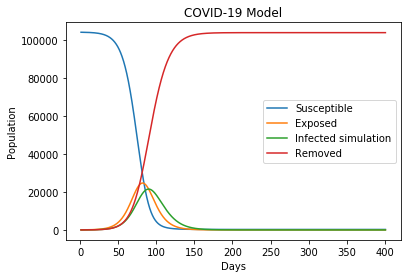

[2.         2.15510458 2.25053174 2.3027212  2.32543752 2.32903048
 2.32079411 2.30565622 2.2868461  2.26642623 2.2456792  2.22537595
 2.20595659 2.18765019 2.17055342 2.15468154 2.14000143 2.12645264
 2.11396076 2.10244574 2.09182689 2.08202588 2.07296829 2.0645844
 2.05680936 2.04958317 2.04285032 2.03655945 2.03066294 2.02511644
 2.01987846 2.01490996 2.01017396 2.00563516 2.00125963 1.99701445
 1.99286747 1.98878696 1.98474139 1.98069919 1.97662846 1.97249679
 1.96827102 1.96391703 1.95939954 1.95468194 1.94972607 1.9444921
 1.93893839 1.93302131 1.92669521 1.91991232 1.91262274 1.90477443
 1.89631337 1.88718363 1.87732762 1.86668642 1.8552002  1.84280869
 1.82945191 1.81507085 1.79960843 1.78301051 1.76522702 1.74621324
 1.72593113 1.70435072 1.68145157 1.65722409 1.63167088 1.60480787
 1.57666526 1.54728816 1.51673689 1.48508697 1.45242855 1.41886553
 1.38451419 1.34950139 1.3139625  1.278039   1.24187592 1.20561915
 1.16941289 1.13339709 1.09770521 1.06246219 1.02778285 0.993770

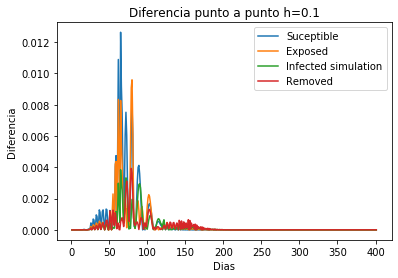

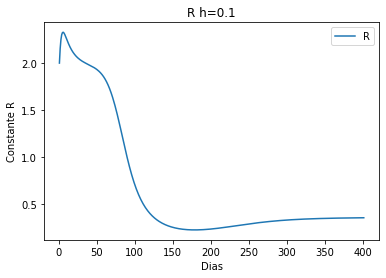

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matrices_movilidad1 import Matriz_Movilidad
Comunas=34
def Runge_Kutta4_Sis(A,B,C,D,S0,E0,I0,R0,t0,T,h):
    t=np.arange(t0,T+h,h)
    S=np.zeros((Comunas,len(t)))
    E=np.zeros((Comunas,len(t)))
    I=np.zeros((Comunas,len(t)))
    R=np.zeros((Comunas,len(t)))
    S[:,0]=S0
    E[:,0]=E0
    I[:,0]=I0
    R[:,0]=R0
    for j in range(len(t)-1):
        k1A = h*A(t[j], S[:,j], I[:,j])
        k1B = h*B(t[j], S[:,j], I[:,j], E[:,j])
        k1C = h*C(t[j], E[:,j], I[:,j])
        k1D = h*D(t[j], I[:,j])
        k2A = h*A(t[j] + h/2, S[:,j] + 0.5*k1A, I[:,j] + 0.5*k1C)
        k2B = h*B(t[j] + h/2, S[:,j] + 0.5*k1A, I[:,j] + 0.5*k1C, E[:,j] + 0.5*k1B)
        k2C = h*C(t[j] + h/2, E[:,j] + 0.5*k1B, I[:,j] + 0.5*k1C)
        k2D = h*D(t[j] + h/2, I[:,j] + 0.5*k1C)      
        k3A = h*A(t[j] + h/2, S[:,j] + 0.5*k2A, I[:,j] + 0.5*k2C)
        k3B = h*B(t[j] + h/2, S[:,j] + 0.5*k2A, I[:,j] + 0.5*k2C, E[:,j] + 0.5*k2B)
        k3C = h*C(t[j] + h/2, E[:,j] + 0.5*k2B, I[:,j] + 0.5*k2C)
        k3D = h*D(t[j] + h/2, I[:,j] + 0.5*k2C)
        k4A = h*A(t[j] + h, S[:,j] + k3A, I[:,j] + k3C)
        k4B = h*B(t[j] + h, S[:,j] + k3A, I[:,j] + k3C, E[:,j] + k3B)
        k4C = h*C(t[j] + h, E[:,j] + k3B, I[:,j] + k3C)
        k4D = h*D(t[j] + h, I[:,j] + k3C)
        S[:,j+1]=S[:,j] +1/6*(k1A + 2*k2A + 2*k3A + k4A)
        E[:,j+1]=E[:,j] +1/6*(k1B + 2*k2B + 2*k3B + k4B)
        I[:,j+1]=I[:,j] +1/6*(k1C + 2*k2C + 2*k3C + k4C)
        R[:,j+1]=R[:,j] +1/6*(k1D + 2*k2D + 2*k3D + k4D)
        
    plt.figure()
    plt.plot(t,S[0,:],label='Susceptible')
    plt.plot(t,E[0,:],label='Exposed')
    plt.plot(t,I[0,:],label='Infected simulation')
    plt.plot(t,R[0,:],label='Removed')
    plt.xlabel('Days')
    plt.ylabel('Population')
    plt.title('COVID-19 Model')
    plt.legend(loc=0)
    plt.show()
    return [S, E, I, R]  

#S0=[17500000] #17500000
#E0=[0]        #0
#I0=[1]        #1
#R0=[0]        #0
So = pd.read_excel("poblacion_Inicial_S_stgo.xlsx", header=None).to_numpy()
S0 = So[:,0]
Eo = pd.read_excel("poblacion_Inicial_E_stgo.xlsx", header=None).to_numpy() 
E0 = Eo[:,0]
Io = pd.read_excel("poblacion_Inicial_I_stgo.xlsx", header=None).to_numpy()
I0 = Io[:,0]
Ro = pd.read_excel("poblacion_Inicial_R_stgo.xlsx", header=None).to_numpy()
R0 = Ro[:,0]

#N=[1/(S0[0] + E0[0] + I0[0] + R0[0])]
n = pd.read_excel("poblacion_N_stgo.xlsx", header=None).to_numpy()
N=1/n[:,0]
#G=np.eye(Comunas,Comunas)

P = pd.read_excel("connectivity_stgo2.xlsx", header=None)
G = Matriz_Movilidad(P)

beta=0.2     #0.8
sigma=0.1   #0.4
gamma=0.1    #1/14
    
A = lambda t,S,I: -beta*np.diag(N).dot(np.diag(S)).dot(G).dot(I);
B = lambda t,S,I,E: beta*np.diag(N).dot(np.diag(S)).dot(G).dot(I) - sigma*E;
C = lambda t,E,I: sigma*E - gamma*I;
D = lambda t,I: gamma*I;

t0=1
T=401
h=0.1
SEIR=Runge_Kutta4_Sis(A,B,C,D,S0,E0,I0,R0,t0,T,h)

#t=np.arange(t0,T+h,h)
#S_su1 = pd.read_excel("Simulacion-400dias-S.xlsx", header=None).to_numpy()
#E_su1 = pd.read_excel("Simulacion-400dias-E.xlsx", header=None).to_numpy()
#I_su1 = pd.read_excel("Simulacion-400dias-I.xlsx", header=None).to_numpy()
#R_su1 = pd.read_excel("Simulacion-400dias-R.xlsx", header=None).to_numpy()

#dif_S=np.abs(SEIR[0][0]-S_su1[0,:])
#dif_E=np.abs(SEIR[1][0]-E_su1[0,:])
#dif_I=np.abs(SEIR[2][0]-I_su1[0,:])
#dif_R=np.abs(SEIR[3][0]-R_su1[0,:])

#plt.figure()
#plt.plot(t,dif_S,label='Suceptible')
#plt.plot(t,dif_E,label='Exposed')
#plt.plot(t,dif_I,label='Infected simulation')
#plt.plot(t,dif_R,label='Removed')
#plt.xlabel('Dias')
#plt.ylabel('Diferencia')
#plt.title('Diferencia punto a punto')
#plt.legend(loc=0)
#plt.show()

####################### h mas pequeño y soluciones sampleadas 
S=SEIR[0][0]
E=SEIR[1][0]
I=SEIR[2][0]
R=SEIR[3][0]

NN=range(1,T+1)
S_Dias=np.zeros((T))
E_Dias=np.zeros((T))
I_Dias=np.zeros((T))
R_Dias=np.zeros((T))
posicion_entero=np.zeros((len(NN)+1))
for i in NN:
    k=round((i-t0)/h)
    S_Dias[i-1]=S[k]
    E_Dias[i-1]=E[k]
    I_Dias[i-1]=I[k]
    R_Dias[i-1]=R[k]
    posicion_entero[i]=k 
    
R0=E_Dias/I_Dias
print(R0)
### Grafico de diferencia punto a punto entre datos "sapleados dia a dia" y 
### datos de Alejandro.

S_su1 = pd.read_excel("Simulacion-400dias-S.xlsx", header=None).to_numpy()
E_su1 = pd.read_excel("Simulacion-400dias-E.xlsx", header=None).to_numpy()
I_su1 = pd.read_excel("Simulacion-400dias-I.xlsx", header=None).to_numpy()
R_su1 = pd.read_excel("Simulacion-400dias-R.xlsx", header=None).to_numpy()

dif_S=np.abs(S_Dias-S_su1[0,:])
dif_E=np.abs(E_Dias-E_su1[0,:])
dif_I=np.abs(I_Dias-I_su1[0,:])
dif_R=np.abs(R_Dias-R_su1[0,:])

tt=np.arange(t0,T+1,1)
plt.figure()
plt.plot(tt,dif_S,label='Suceptible')
plt.plot(tt,dif_E,label='Exposed')
plt.plot(tt,dif_I,label='Infected simulation')
plt.plot(tt,dif_R,label='Removed')
plt.xlabel('Dias')
plt.ylabel('Diferencia')
plt.title('Diferencia punto a punto h=0.1')
plt.legend(loc=0)
plt.show()

tt=np.arange(t0,T+1,1)
plt.figure()
plt.plot(tt,R0,label='R')
plt.xlabel('Dias')
plt.ylabel('Constante R')
plt.title('R h=0.1')
plt.legend(loc=0)
plt.show()

In [ ]:
#import numpy as np
#import pandas as pd
#from scipy.integrate import odeint
#import matplotlib.pyplot as plt
#Modulo matrices_movilidad contiene dos funciones para constriur G, eventualmente, ellas se podran modificar y asi modificamos G
#from matrices_movilidad1 import Matriz_Movilidad
#from matrices_movilidad1 import Matriz_Movilidad_alpha 
# odeint(sum_g_ij, N_i)
# Si no se considera alpha, cuarentena y k toman el valor de None
#def Model(Init_Cond,t,Ni,P,cuarentena,k):
#    if cuarentena and k is not None:
#        if t==cuarentena:
#            G=Matriz_Movilidad_alpha(P,k)
#            g=sum(G[0,:])
#        elif t>cuarentena:
#            g=sum(G[0,:])
#    else:
#        G = Matriz_Movilidad(P)
#        g=sum(G[0,:])
#        beta=0.2
#        sigma=0.1
#        gamma=0.1
    
#        S=Init_Cond[0]
#        E=Init_Cond[1]
#        I=Init_Cond[2]
#        R=Init_Cond[3]
    
#        dSdt=-beta*S*(1/Ni)*g*I
#        dEdt=beta*S*(1/Ni)*g*I - sigma*E
#        dIdt=sigma*E - gamma*I
#        dRdt=gamma*I
#        return [dSdt, dEdt, dIdt, dRdt]

#So = pd.read_excel("poblacion_Inicial_S_stgo.xlsx", header=None).to_numpy()
#S0 = So[0,0]
#Eo = pd.read_excel("poblacion_Inicial_E_stgo.xlsx", header=None).to_numpy() 
#E0 = Eo[0,0]
#Io = pd.read_excel("poblacion_Inicial_I_stgo.xlsx", header=None).to_numpy()
#I0 = Io[0,0]
#Ro = pd.read_excel("poblacion_Inicial_R_stgo.xlsx", header=None).to_numpy()
#R0 = Ro[0,0] 

#Init_Cond=[S0,E0,I0,R0]
#T=401
#h=0.1
#t0=1
#t=np.arange(t0,T+h,h)

#n = pd.read_excel("poblacion_N_stgo.xlsx", header=None).to_numpy()
#Ni=n[0,0]

#P = pd.read_excel("connectivity_stgo2.xlsx", header=None)
#SEIR=odeint(Model,Init_Cond,t, args=(Ni,P,None,None))

#S=SEIR[:,0]
#E=SEIR[:,1]
#I=SEIR[:,2]
#R=SEIR[:,3]

#### h mas pequeño y extracción de valores en días [1,2,3,4,5,6,7,8,9,....]
#NN=range(1,T+1)
#S_Dias=np.zeros((T))
#E_Dias=np.zeros((T))
#I_Dias=np.zeros((T))
#R_Dias=np.zeros((T))
#posicion_entero=np.zeros((len(NN)+1))
#for i in NN:
#    k=round((i-t0)/h)
#    S_Dias[i-1]=S[k]
#    E_Dias[i-1]=E[k]
#    I_Dias[i-1]=I[k]
#    R_Dias[i-1]=R[k]
#    posicion_entero[i]=k           

    
### Grafico de soluciones "sampleadas" a un día
#tt=np.arange(t0,T+1,1)
#plt.figure()
#plt.plot(tt,S_Dias,label='Susceptible')
#plt.plot(tt,E_Dias,label='Exposed')
#plt.plot(tt,I_Dias,label='Infected simulation')
#plt.plot(tt,R_Dias,label='Removed')
#plt.xlabel('Days')
#plt.ylabel('Population')
#plt.title('COVID-19 Model con Odeint_')
#plt.legend(loc=0)
#plt.show()   

### Grafico de diferencia punto a punto entre datos "sapleados dia a dia" y 
### datos de Alejandro.

#S_su1 = pd.read_excel("Simulacion-400dias-S.xlsx", header=None).to_numpy()
#E_su1 = pd.read_excel("Simulacion-400dias-E.xlsx", header=None).to_numpy()
#I_su1 = pd.read_excel("Simulacion-400dias-I.xlsx", header=None).to_numpy()
#R_su1 = pd.read_excel("Simulacion-400dias-R.xlsx", header=None).to_numpy()

#dif_S=np.abs(S_Dias-S_su1[0,:])
#dif_E=np.abs(E_Dias-E_su1[0,:])
#dif_I=np.abs(I_Dias-I_su1[0,:])
#dif_R=np.abs(R_Dias-R_su1[0,:])

#tt=np.arange(t0,T+1,1)
#plt.figure()
#plt.plot(tt,dif_S,label='Suceptible')
#plt.plot(tt,dif_E,label='Exposed')
#plt.plot(tt,dif_I,label='Infected simulation')
#plt.plot(tt,dif_R,label='Removed')
#plt.xlabel('Dias')
#plt.ylabel('Diferencia')
#plt.title('Diferencia punto a punto')
#plt.legend(loc=0)
#plt.show()

### Grafico de solución sin extraer datos en cada día.
#plt.figure()
#plt.plot(t,S,label='Susceptible')
#plt.plot(t,E,label='Exposed')
#plt.plot(t,I,label='Infected simulation')
#plt.plot(t,R,label='Removed')
#plt.xlabel('Days')
#plt.ylabel('Population')
#plt.title('COVID-19 Model con Odeint')
#plt.legend(loc=0)
#plt.show()   

#### Grafico de datos alejandro
#S_su1 = pd.read_excel("Simulacion-400dias-S.xlsx", header=None).to_numpy()
#E_su1 = pd.read_excel("Simulacion-400dias-E.xlsx", header=None).to_numpy()
#I_su1 = pd.read_excel("Simulacion-400dias-I.xlsx", header=None).to_numpy()
#R_su1 = pd.read_excel("Simulacion-400dias-R.xlsx", header=None).to_numpy()
#plt.figure()
#plt.plot(tt,S_su1[0,:],label='Suceptible')
#plt.plot(tt,E_su1[0,:],label='Exposed')
#plt.plot(tt,I_su1[0,:],label='Infected simulation')
#plt.plot(tt,R_su1[0,:],label='Removed')
#plt.xlabel('Days')
#plt.ylabel('Population')
#plt.title('COVID-19 Model 1 (data)')
#plt.legend(loc=0)
#plt.show() 

### Grafico de diferencias punto a punto.

#dif_S=np.abs(S-S_su1[0,:])
#dif_E=np.abs(E-E_su1[0,:])
#dif_I=np.abs(I-I_su1[0,:])
#dif_R=np.abs(R-R_su1[0,:])

#plt.figure()
#plt.plot(t,dif_S,label='Suceptible')
#plt.plot(t,dif_E,label='Exposed')
#plt.plot(t,dif_I,label='Infected simulation')
#plt.plot(t,dif_R,label='Removed')
#plt.xlabel('Dias')
#plt.ylabel('Diferencia')
#plt.title('Diferencia punto a punto')
#plt.legend(loc=0)
#plt.show()
